# Student grades prediction

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [83]:
path = r'C:\Users\HP\Desktop\Grades.csv'
df = pd.read_csv(path)

In [84]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [85]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [86]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
507,CS-97508,A-,C-,A,A,B+,A-,A-,B,A-,...,A-,B,A-,B,B,B+,A-,B,B+,3.116
229,CS-97230,B-,B,C,A-,C-,A,A-,B-,B,...,C-,C,A-,C,A-,A-,B-,B+,A-,2.644
525,CS-97526,C,A-,A,C+,C,B-,C+,A+,B-,...,A-,B-,A,B-,B,C,C+,D+,B,2.941
508,CS-97509,A-,D,A,B+,B+,A,B,B,B+,...,B+,B+,B+,B+,B,B,A-,B+,B,3.056
313,CS-97314,D+,A-,A+,B,A,C-,B+,B-,B,...,A+,B,A,A,NaN,A,B,A-,B+,3.418
340,CS-97341,D,D,B,C+,D,B-,B,B-,B-,...,C,F,B+,F,NaN,F,C,B,D+,1.804
26,CS-97027,A,B+,A,A-,A-,A,C+,A,A,...,C+,B,B,B-,A-,A,B,A-,A,3.440
75,CS-97076,B-,C-,B,D,B-,C+,C-,B-,C,...,C,B-,B-,B-,A,A,B,B,B+,2.683
144,CS-97145,A+,A-,A,A+,A,A,A,A-,A,...,A-,A,A+,A-,A-,A,A,A-,A,3.906
527,CS-97528,C-,D,B,B+,C-,B-,C+,B,C+,...,D,D,A,F,D+,D,C+,C-,F,1.957


In [88]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [89]:
df.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [91]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

#### There are some null values in data set so we treat them

<Axes: >

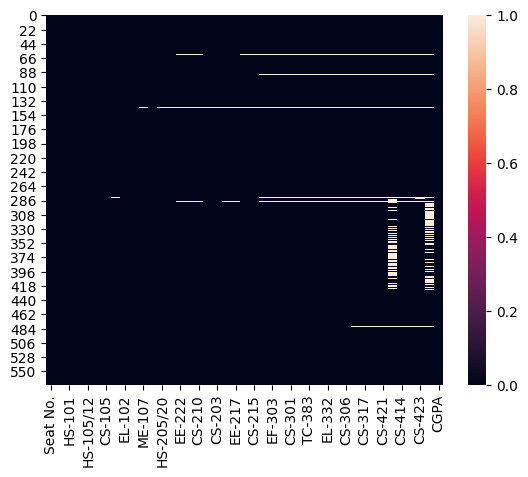

In [92]:
sns.heatmap(df.isnull())  #heatmap of null values

In [93]:
df.fillna(0, inplace=True)
#treated all nan values

<Axes: >

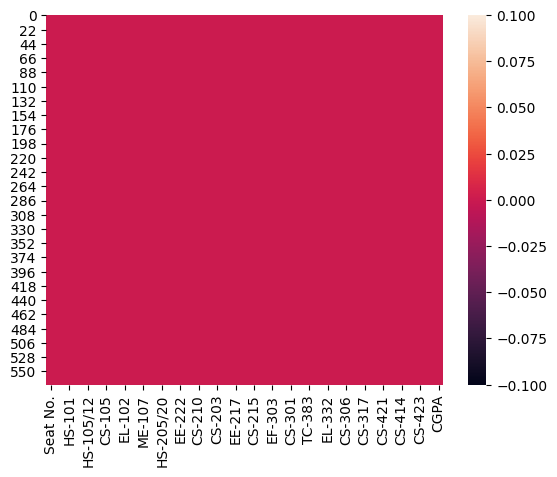

In [94]:
sns.heatmap(df.isnull())

#### All Null values treated

In [96]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
506,CS-97507,B+,B-,A,A-,B,A,A,C-,A-,...,A-,B+,A,B+,A-,B,B,B,B,3.107
286,CS-97287,B,A-,A+,A,A+,A-,A-,A,A,...,A+,A,A+,A-,0,A+,A-,A,B+,3.856
247,CS-97248,A-,B+,A-,B+,B-,A-,B-,B,B+,...,D+,C,B-,B-,B,A-,B-,C+,A-,2.687
94,CS-97095,C-,D,D+,D,D+,D+,D+,D,C,...,D,C-,C-,C,C+,B,C-,C-,B,1.805
236,CS-97237,A-,B-,B+,A,B+,A-,A-,A-,B-,...,C+,B-,B-,C,A,A-,B-,B+,B,2.948
389,CS-97390,B+,B,A,B-,B+,B+,B+,A+,B,...,A+,B,B,B-,B,A,B+,A-,0,3.245
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
206,CS-97207,B,C-,B,A+,C,A,B+,B-,B-,...,B,C,A,A-,B,A,A-,A-,B+,3.094
504,CS-97505,A,B,A,A,A,A+,A-,B+,A-,...,A-,B+,A,A,A,B+,A,A-,A-,3.711
532,CS-97533,B+,C,A,B,A-,A,B+,D+,B+,...,B,B-,A,B,C+,B,A-,D+,C+,3.068


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

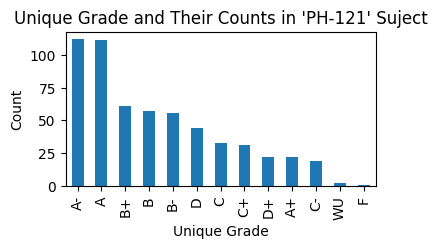

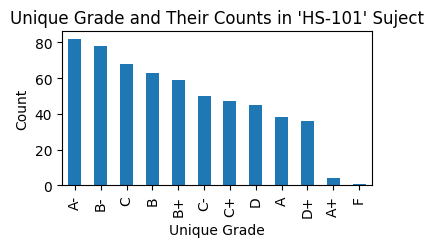

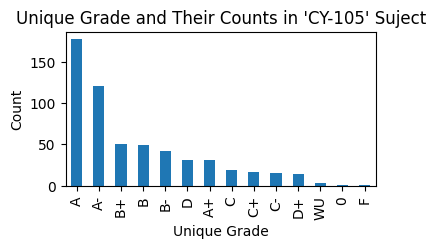

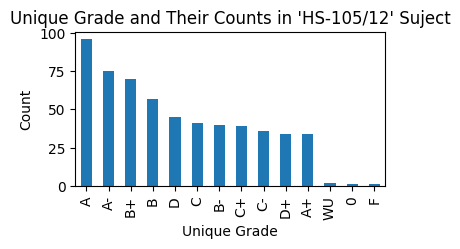

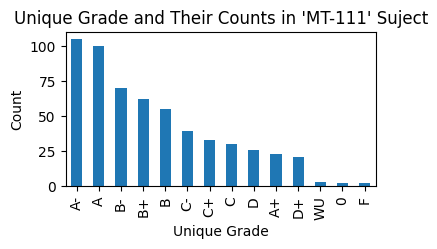

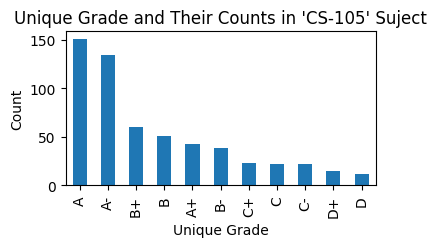

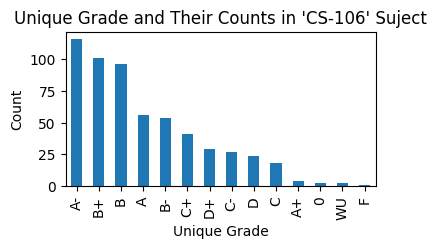

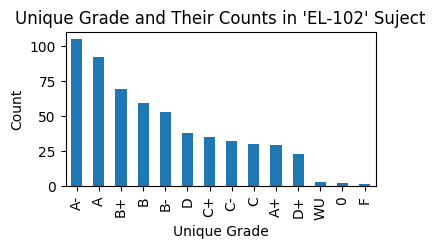

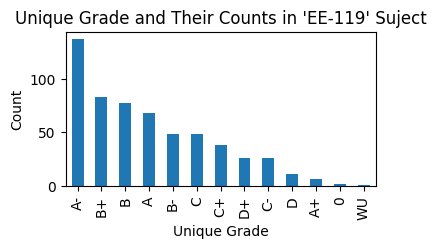

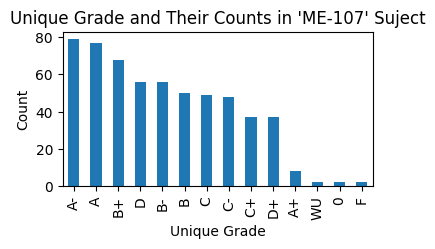

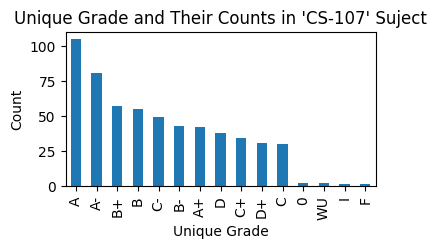

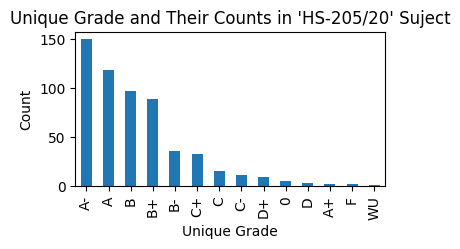

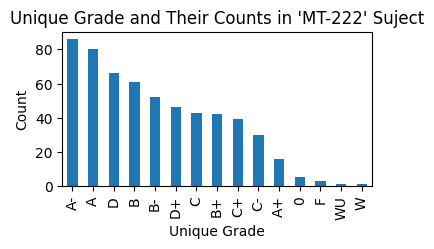

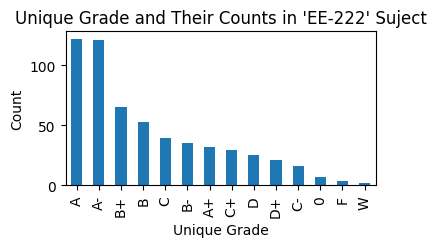

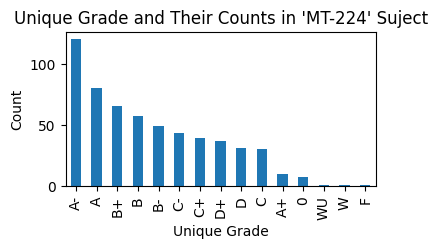

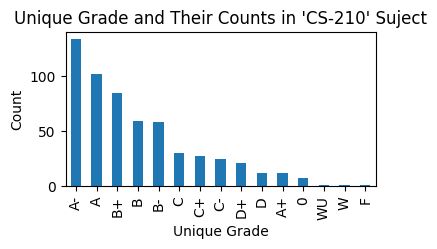

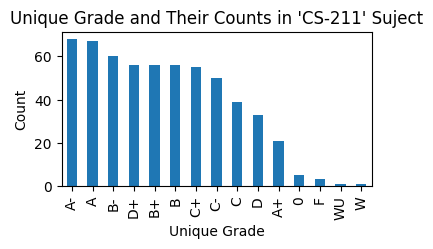

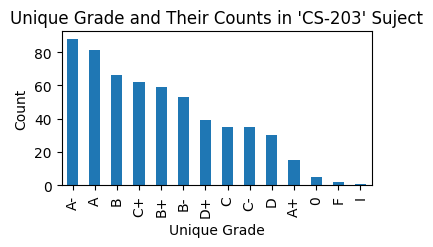

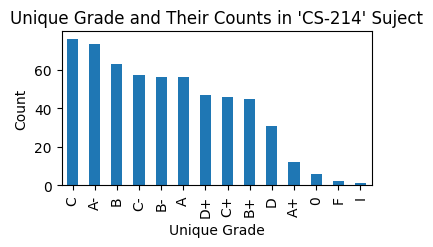

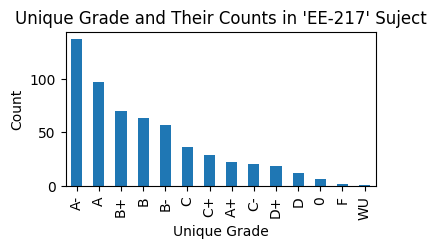

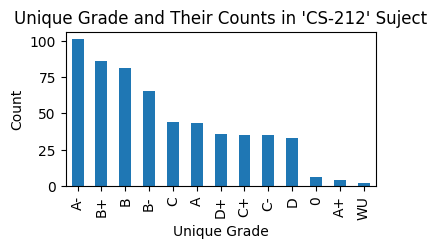

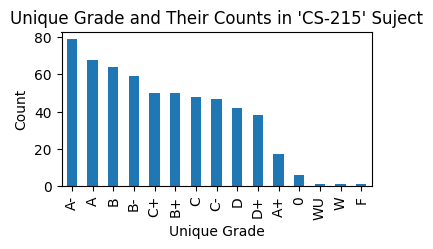

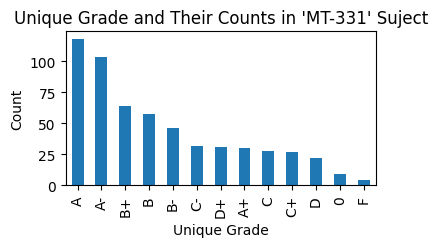

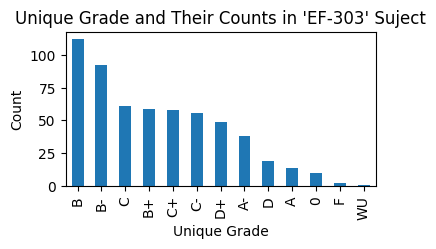

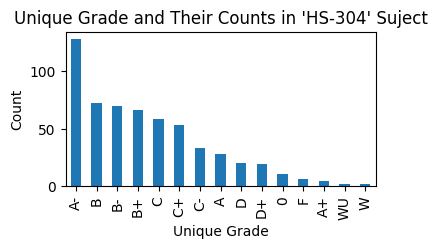

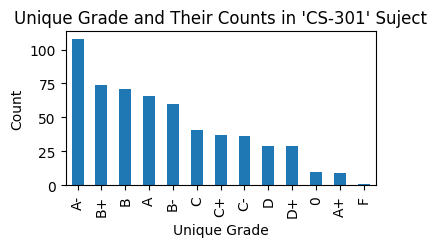

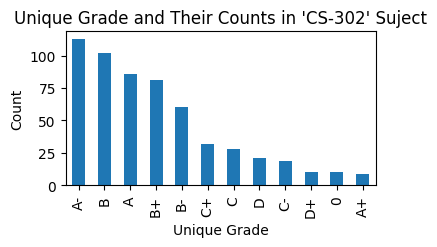

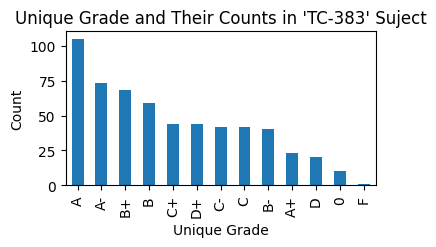

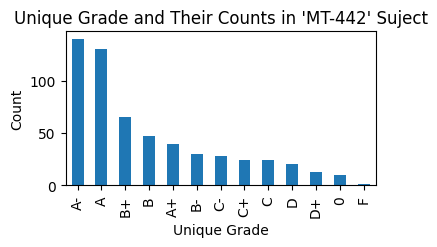

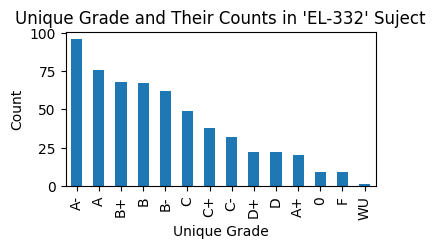

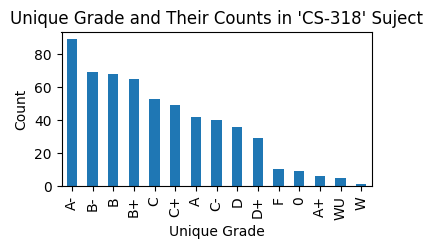

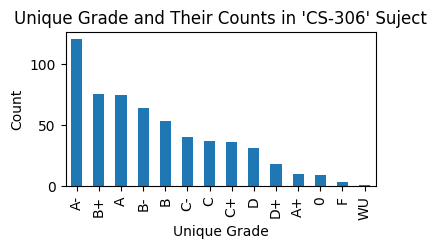

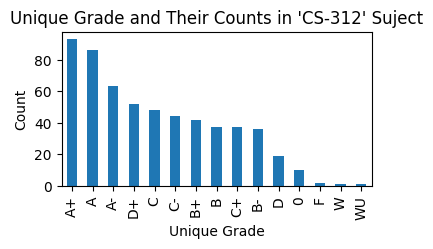

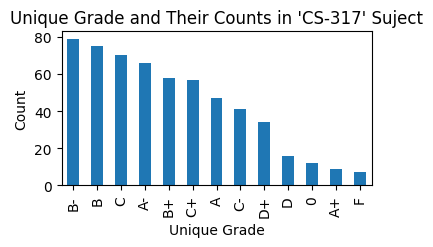

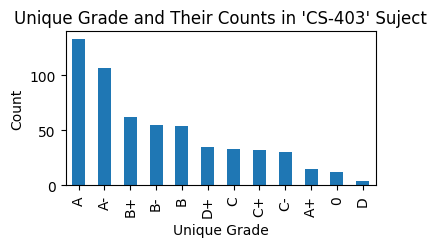

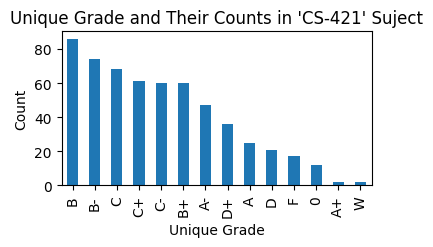

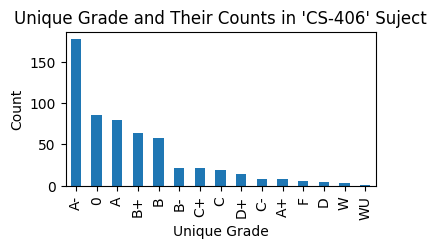

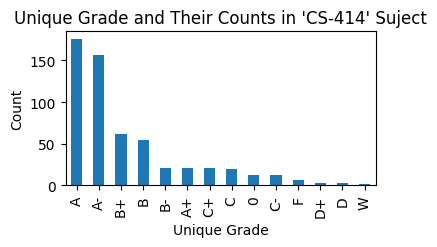

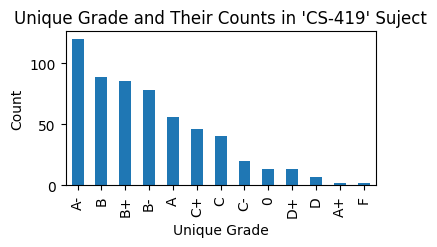

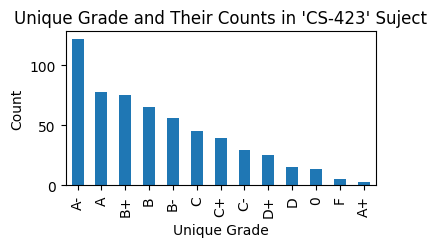

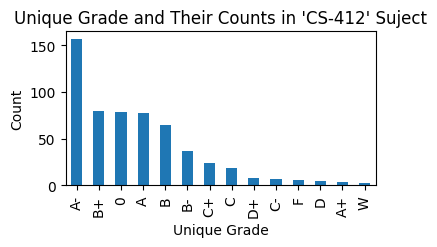

In [98]:
columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
    'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
    'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224',
    'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
    'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304',
    'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332',
    'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
    'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
    'CS-412']

for column_name in columns:
    unique_counts = df[column_name].value_counts()
    
    plt.figure(figsize=(4, 2))
    unique_counts.plot(kind='bar')
    plt.title(f"Unique Grade and Their Counts in '{column_name}' Suject")
    plt.xlabel("Unique Grade")
    plt.ylabel("Count")
    plt.show()

In [99]:
unique = df['PH-121'].value_counts()
print("number of students by grade of subject 'PH-121':")
print(unique)

number of students by grade of subject 'PH-121':
PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64


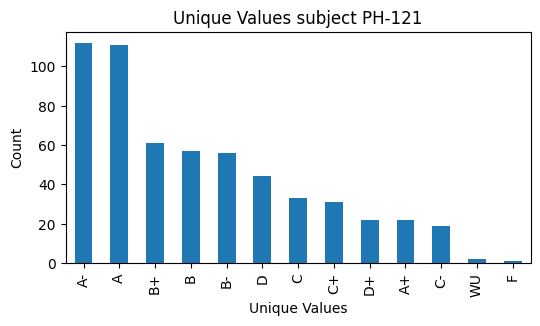

In [100]:
# Calculate unique values and their counts in 'PH-121' column
unique= df['PH-121'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject PH-121" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [101]:
unique = df['HS-101'].value_counts()
print("Number of students by grade of subject HS-101:")
print(unique)

Number of students by grade of subject HS-101:
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64


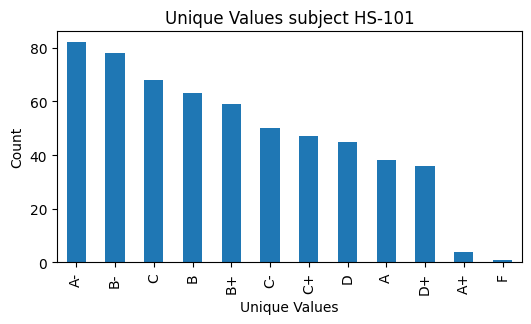

In [102]:
unique= df['HS-101'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject HS-101" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [103]:
unique = df['CY-105'].value_counts()
print("number of students by grade of subject CY-105:")
print(unique)

number of students by grade of subject CY-105:
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
0       1
F       1
Name: count, dtype: int64


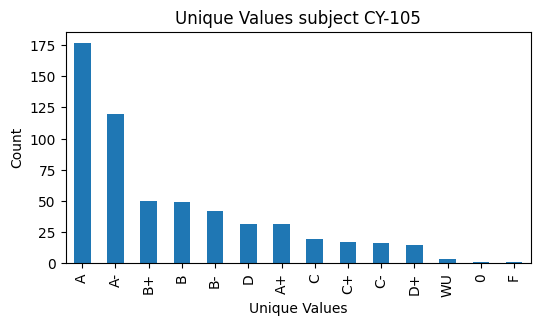

In [104]:
unique= df['CY-105'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject CY-105" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [105]:
unique = df['HS-105/12'].value_counts()
print("number of students by grade of subject HS-105/12:")
print(unique)

number of students by grade of subject HS-105/12:
HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
0      1
F      1
Name: count, dtype: int64


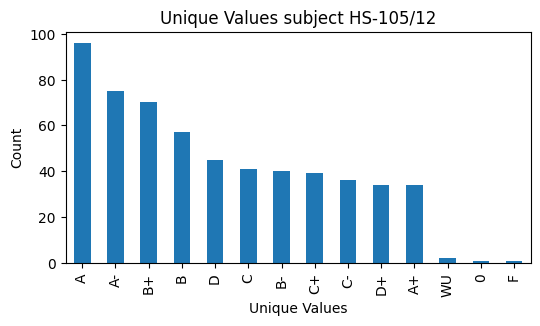

In [106]:
unique= df['HS-105/12'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject HS-105/12" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [107]:
unique = df['MT-111'].value_counts()
print("number of students by grade of subject MT-111:")
print(unique)

number of students by grade of subject MT-111:
MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
0       2
F       2
Name: count, dtype: int64


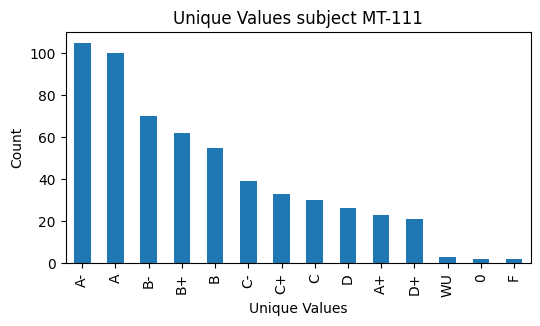

In [108]:
unique= df['MT-111'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject MT-111" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [109]:
unique = df['CS-105'].value_counts()
print("number of students by grade of subject CS-105:")
print(unique)

number of students by grade of subject CS-105:
CS-105
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: count, dtype: int64


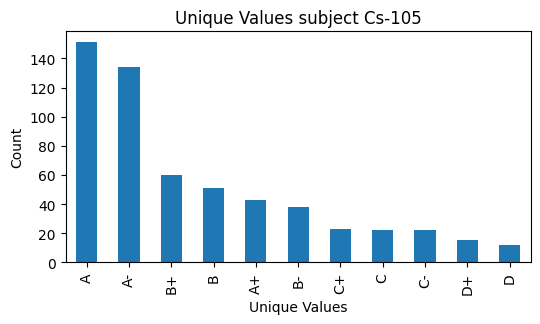

In [110]:
unique= df['CS-105'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject Cs-105" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [111]:
unique = df['CS-106'].value_counts()
print("number of students by grade of subject CS-106:")
print(unique)

number of students by grade of subject CS-106:
CS-106
A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
0       2
WU      2
F       1
Name: count, dtype: int64


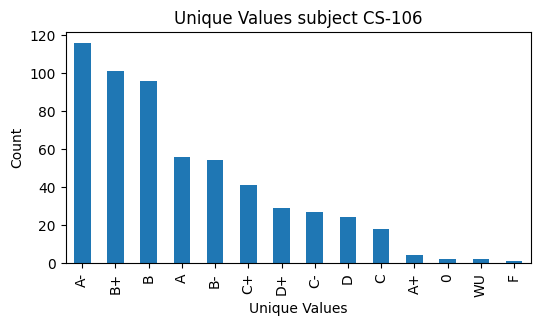

In [112]:
unique= df['CS-106'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject CS-106" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [113]:
unique = df['EL-102'].value_counts()
print("number of students by grade of subject EL-102:")
print(unique)

number of students by grade of subject EL-102:
EL-102
A-    105
A      92
B+     69
B      59
B-     53
D      38
C+     35
C-     32
C      30
A+     29
D+     23
WU      3
0       2
F       1
Name: count, dtype: int64


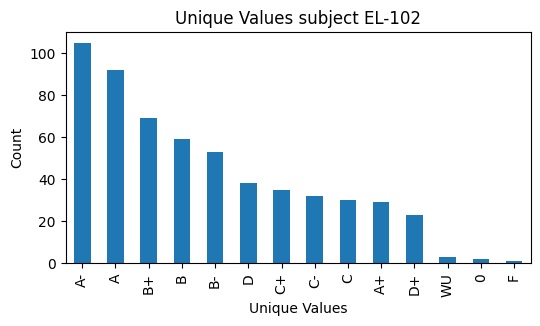

In [114]:
unique= df['EL-102'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject EL-102" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [115]:
unique = df['EE-119'].value_counts()
print("number of students by grade of subject EE-119:")
print(unique)

number of students by grade of subject EE-119:
EE-119
A-    137
B+     83
B      77
A      68
B-     48
C      48
C+     38
D+     26
C-     26
D      11
A+      6
0       2
WU      1
Name: count, dtype: int64


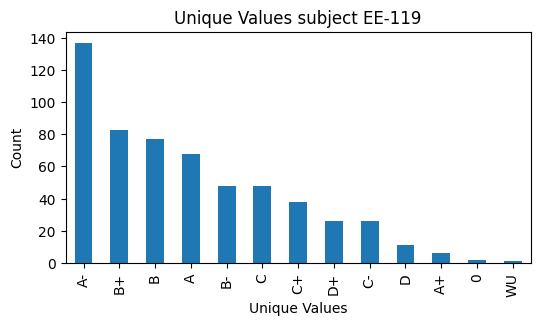

In [116]:
unique= df['EE-119'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject EE-119" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [117]:
unique = df['ME-107'].value_counts()
print("number of students by grade of subject ME-107:")
print(unique)

number of students by grade of subject ME-107:
ME-107
A-    79
A     77
B+    68
D     56
B-    56
B     50
C     49
C-    48
C+    37
D+    37
A+     8
WU     2
0      2
F      2
Name: count, dtype: int64


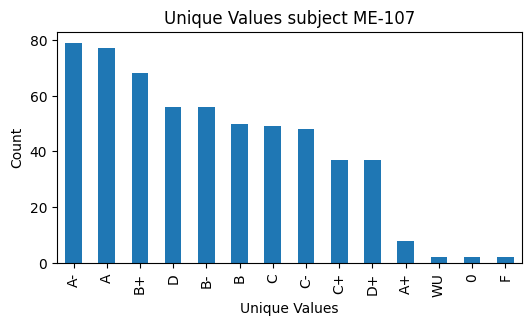

In [118]:
unique= df['ME-107'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject ME-107" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

In [119]:
df.sample()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
339,CS-97340,D,D,B,C-,C+,B,B-,C+,C,...,A,B-,C+,B,B,A-,C+,B+,0,2.49


In [120]:
unique = df['CS-107'].value_counts()
print("number of students by grade of subject CS-107:")
print(unique)

number of students by grade of subject CS-107:
CS-107
A     105
A-     81
B+     57
B      55
C-     49
B-     43
A+     42
D      38
C+     34
D+     31
C      30
0       2
WU      2
I       1
F       1
Name: count, dtype: int64


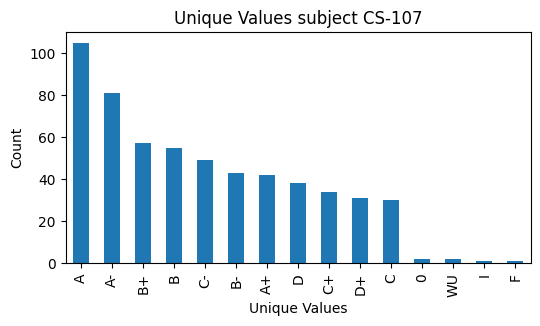

In [121]:
unique= df['CS-107'].value_counts()
plt.figure(figsize=(6,3))
unique.plot(kind='bar')
plt.title("Unique Values subject CS-107" )
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()

# Encoding

In [122]:
u_columns= df.columns[1:-1]

for column_name in u_columns:
    unique_values = df[column_name].unique()
    print(unique_values)

['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 0 'WU' 'A+' 'F']
['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 0 'WU' 'A+' 'F']
['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 0 'A+' 'F' 'WU']
['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 0 'A+' 'F' 'WU']
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 0 'A+' 'WU' 'F']
['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' 0 'A+']
['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' 0 'F' 'A+']
['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' 0 'A+' 'I' 'WU' 'F']
['B+' 'C+' 'A-' 'B' 'A' 'B-' 0 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F']
['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' 0 'C-' 'WU' 'F' 'A+' 'W']
['A-' 'C-' 'A' 'B-' 'B+' 'C+' 'D+' 'B' 0 'C' 'W' 'A+' 'D' 'F']
['B-' 'D+' 'A' 'D' 'A-' 'C-' 'C' 'B+' 'C+' 'B' 0 'A+' 'WU' 'W' 'F']
['C+' 'D+' 'A' 'C' 'A-' 'B+' 'B-' 'B' 0 'D' 'A+' 'C-'

In [123]:
unique_values

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', 0, 'A+', 'C', 'D+', 'F',
       'W', 'D'], dtype=object)

In [124]:
grade= {
    'A+': 12,
    'A': 11,
    'A-': 10,
    'B+': 9,
    'B': 8,
    'B-': 7,
    'C+': 6,
    'C': 5,
    'C-': 4,
    'D+': 3,
    'D': 2,
    'F': 1,
    'WU': 0,
    'W' :0,
    'I':0,
    0: 0  
}

# Perform ordinal encoding for the 'Grades' column
df= df.replace(grade)

print(df)

     Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001       7       3       4          5       4       3       2   
1    CS-97002      11       2       3          2       7       5       2   
2    CS-97003      11       8      11          7       9      11       7   
3    CS-97004       2       6       3          2       2      10       3   
4    CS-97005      10      10      10          9      11      11      10   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567       8      11      11         10      12      11      10   
567  CS-97568      12      11      11         11      11      11      11   
568  CS-97569       8      11      10          9      11      11      11   
569  CS-97570      11       9       2         11       2       3       7   
570  CS-97571       5       2       2          5       5       3       8   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         4

In [125]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
92,CS-97093,2,3,2,2,2,5,8,5,5,...,3,4,4,4,10,10,7,5,7,1.890
27,CS-97028,5,6,3,3,4,9,2,5,8,...,2,2,4,4,8,10,6,7,10,2.188
145,CS-97146,12,11,12,12,11,12,11,11,8,...,10,11,11,10,10,11,11,11,10,3.873
275,CS-97276,7,9,8,3,4,9,4,2,3,...,4,3,4,3,9,9,2,3,8,1.905
83,CS-97084,7,7,10,6,7,8,3,10,7,...,3,6,7,7,11,11,10,10,10,2.763
213,CS-97214,12,9,11,11,7,10,10,8,9,...,4,8,10,9,10,11,10,9,10,3.345
256,CS-97257,7,4,8,7,4,10,6,9,7,...,4,5,7,4,11,10,4,6,10,2.605
394,CS-97395,7,6,9,11,8,5,9,8,7,...,12,8,10,7,0,11,10,11,8,3.136
428,CS-97429,10,8,11,10,10,11,8,11,10,...,11,7,9,9,9,8,8,9,8,3.477
115,CS-97116,7,7,5,7,6,6,3,6,10,...,4,8,7,5,10,11,7,9,11,2.566


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    int64  
 2   HS-101     571 non-null    int64  
 3   CY-105     571 non-null    int64  
 4   HS-105/12  571 non-null    int64  
 5   MT-111     571 non-null    int64  
 6   CS-105     571 non-null    int64  
 7   CS-106     571 non-null    int64  
 8   EL-102     571 non-null    int64  
 9   EE-119     571 non-null    int64  
 10  ME-107     571 non-null    int64  
 11  CS-107     571 non-null    int64  
 12  HS-205/20  571 non-null    int64  
 13  MT-222     571 non-null    int64  
 14  EE-222     571 non-null    int64  
 15  MT-224     571 non-null    int64  
 16  CS-210     571 non-null    int64  
 17  CS-211     571 non-null    int64  
 18  CS-203     571 non-null    int64  
 19  CS-214     571 non-null    int64  
 20  EE-217    

In [127]:
u_columns= df.columns[1:-1]

for column_name in u_columns:
    unique_values = df[column_name].unique()
    print(unique_values)

[ 7 11  2 10  9  8  6  5  4  3  0 12  1]
[ 3  2  8  6 10  7  4  9  5 11 12  1]
[ 4  3 11 10  8  6  9  7  5  2  0 12  1]
[ 5  2  7  9  3  8  4  6 10 11  0 12  1]
[ 4  7  9  2 11  6 10  5  8  3  0 12  1]
[ 3  5 11 10  8  7  9  6  4 12  2]
[ 2  7  3 10  6 11  4  5  8  9  0 12  1]
[ 4 11  9  8 10  7  5  6  3  2  0 12  1]
[ 7  3 10  2 11  9  8  4  6  5  0 12]
[ 4  2 10  6  9 11  3  5  8  7  0  1 12]
[ 4  9  7  2  5 10  6  3  8 11  0 12  1]
[ 9  6 10  8 11  7  0  2 12  5  3  4  1]
[ 2  7 11  3  5  9 10  8  6  0  4  1 12]
[10  4 11  7  9  6  3  8  0  5 12  2  1]
[ 7  3 11  2 10  4  5  9  6  8  0 12  1]
[ 6  3 11  5 10  9  7  8  0  2 12  4  1]
[ 3  2 12  9  7  8 10  4  6  5  0 11  1]
[ 3  5 11  6 10  9  8  7  4  0  2 12  1]
[ 2 10  8  5  7  6 11  4  9  3  0  1 12]
[11  7  3 10 12  5  9  8  0  4  2  1  6]
[ 2  5 10  6  7  3  9  8 11  4  0 12]
[ 4  2 11 10  6  5  9  7  3  0  8 12  1]
[ 5  3 11  6  9 10  8  7 12  2  4  0  1]
[ 4  2  6  9  5  3 10  7 11  0  8  1]
[ 6  4 11  7 10  9  8  0  5  2  3 

#### Encoded all grades

In [128]:
df1 = df.drop('Seat No.', axis=1)
df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,7,3,4,5,4,3,2,4,7,4,...,4,4,4,4,10,11,4,8,10,2.205
1,11,2,3,2,7,5,2,11,3,2,...,3,2,5,2,10,7,5,5,8,2.008
2,11,8,11,7,9,11,7,9,10,10,...,8,8,11,5,11,11,11,10,11,3.608
3,2,6,3,2,2,10,3,4,2,6,...,3,5,3,4,7,8,6,6,6,1.906
4,10,10,10,9,11,11,10,9,11,10,...,7,9,9,7,10,11,10,10,11,3.448


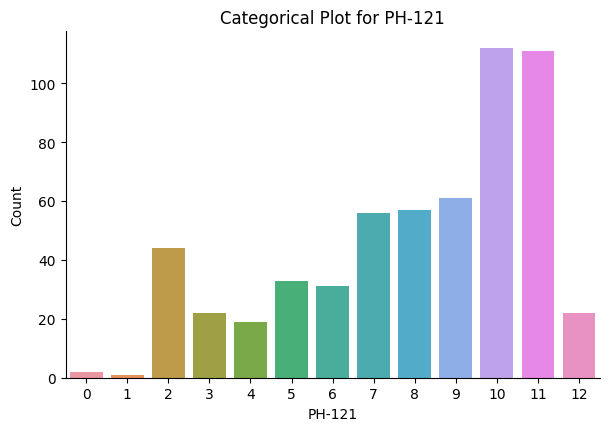

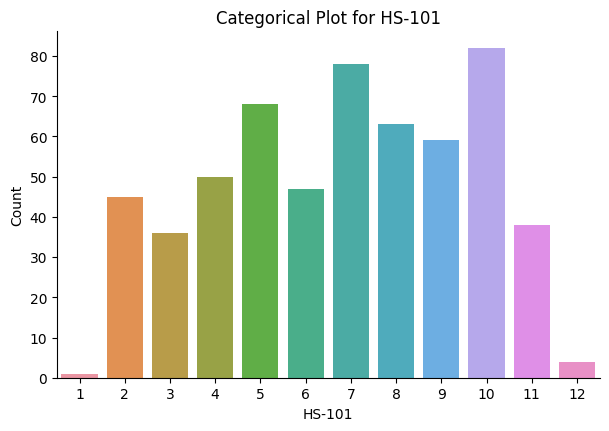

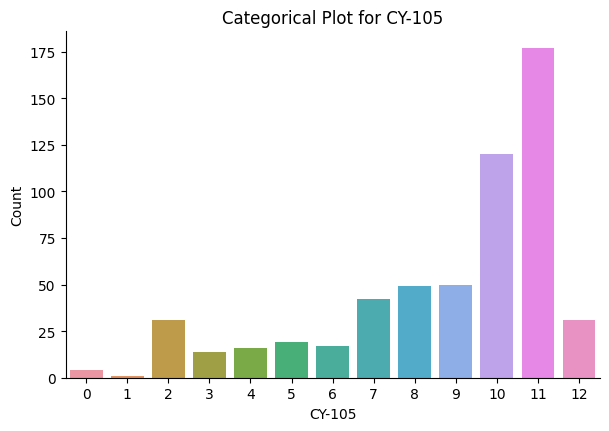

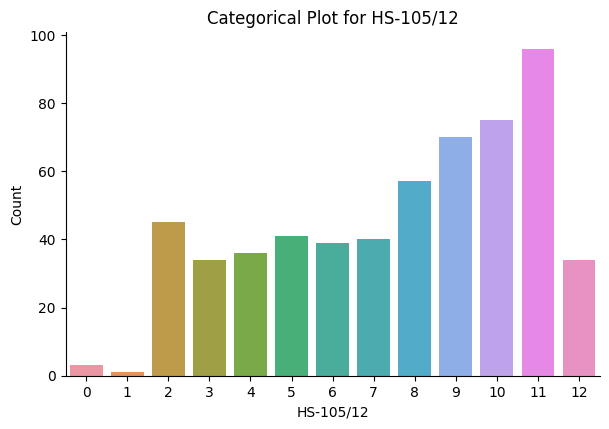

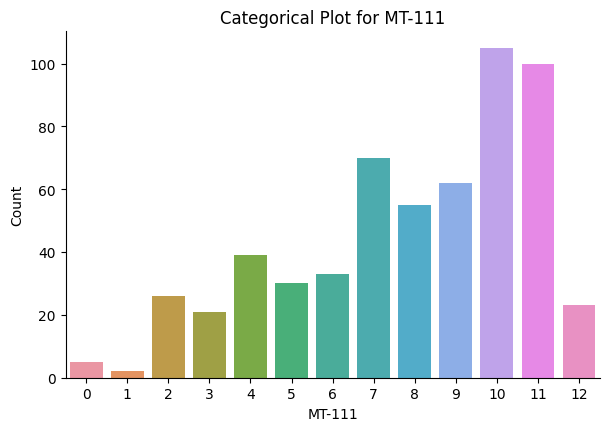

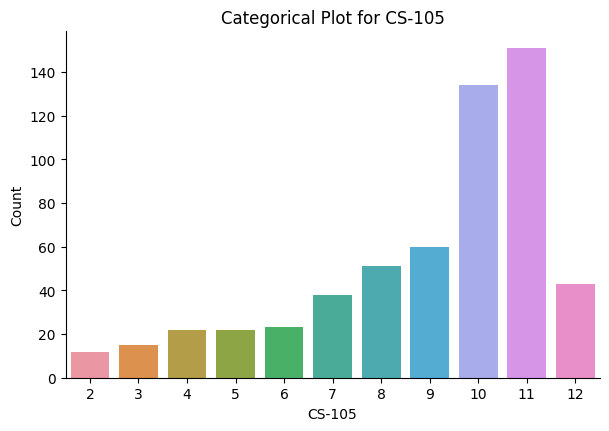

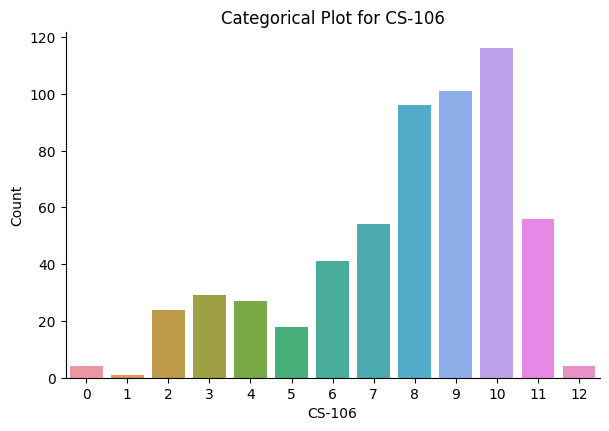

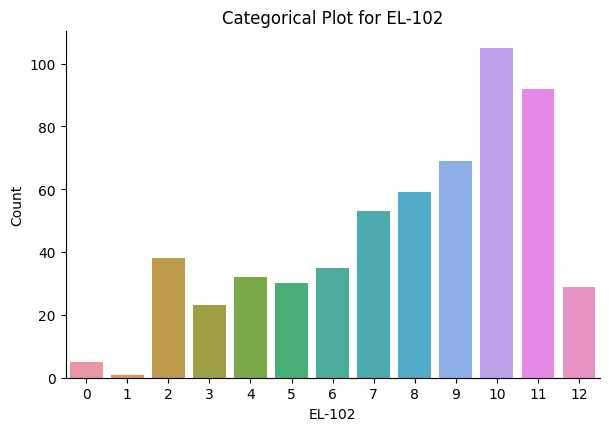

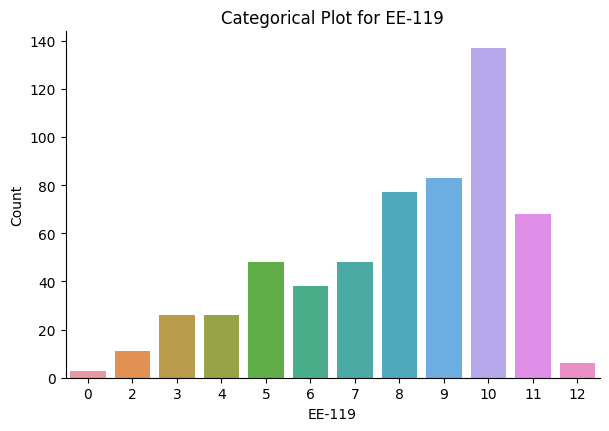

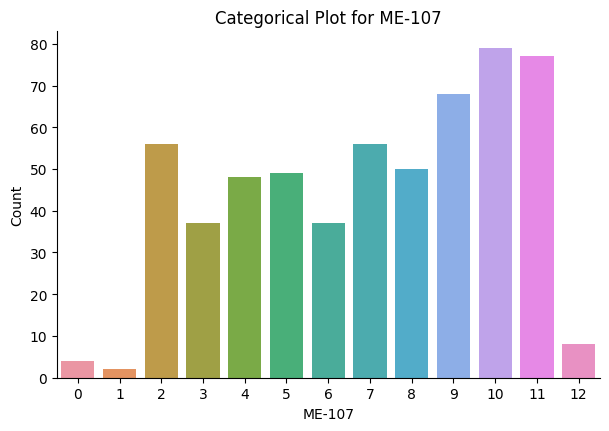

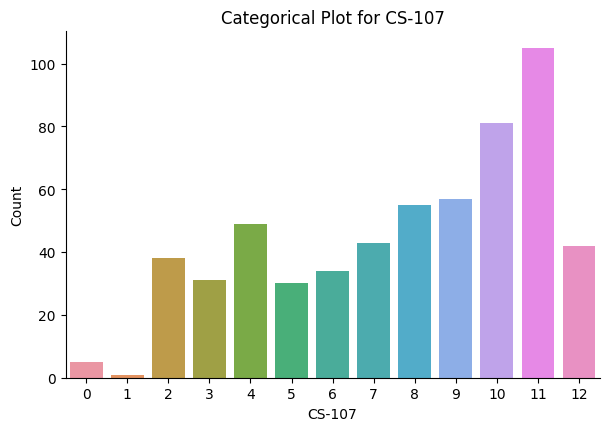

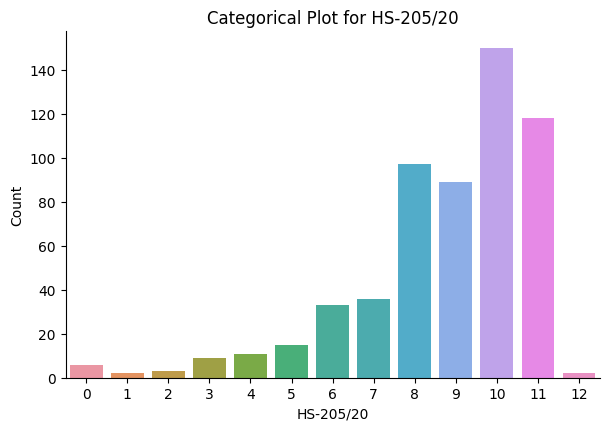

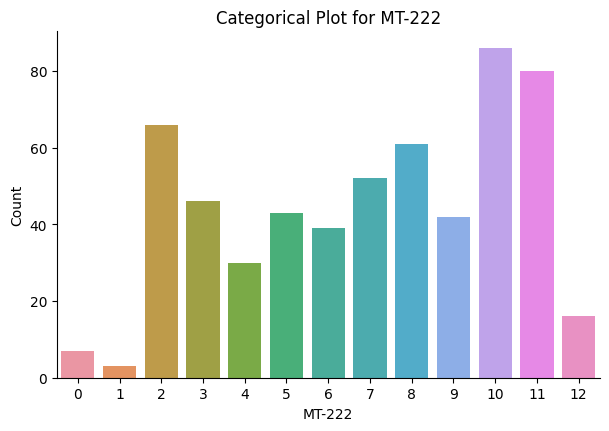

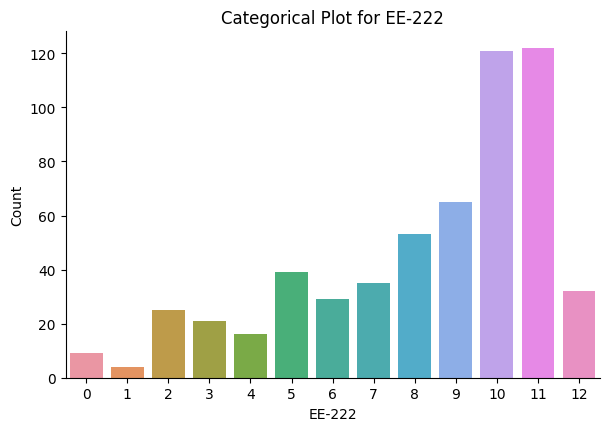

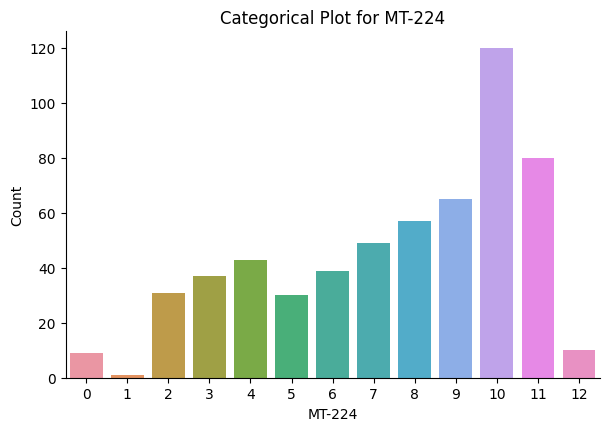

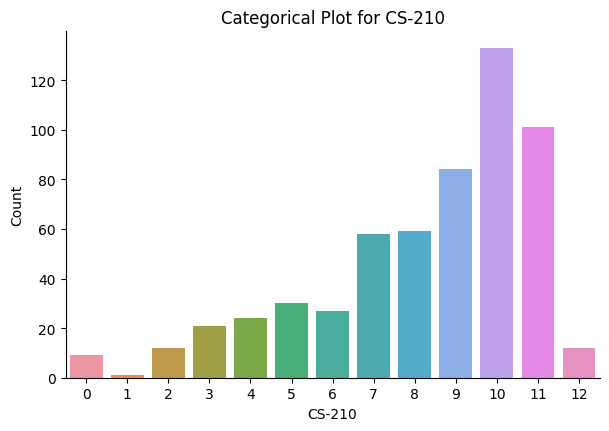

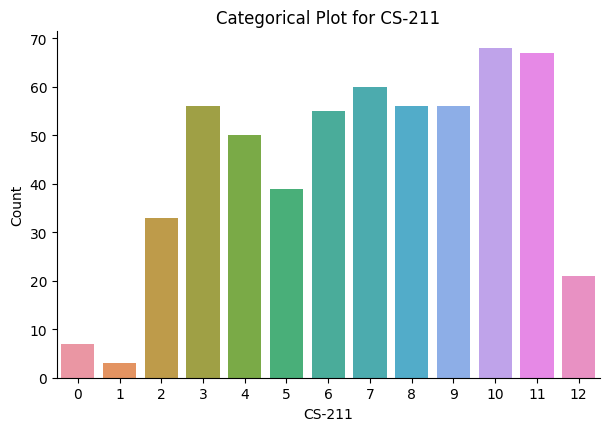

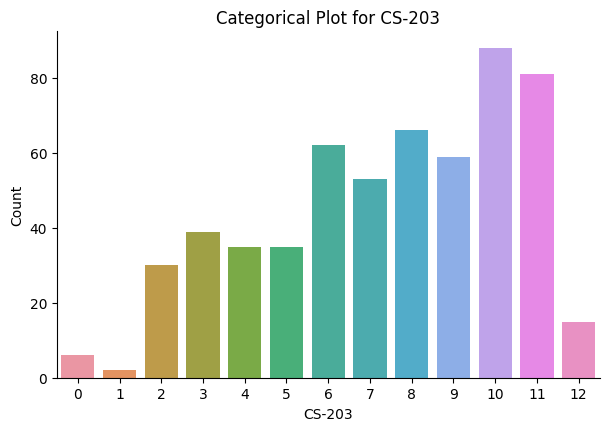

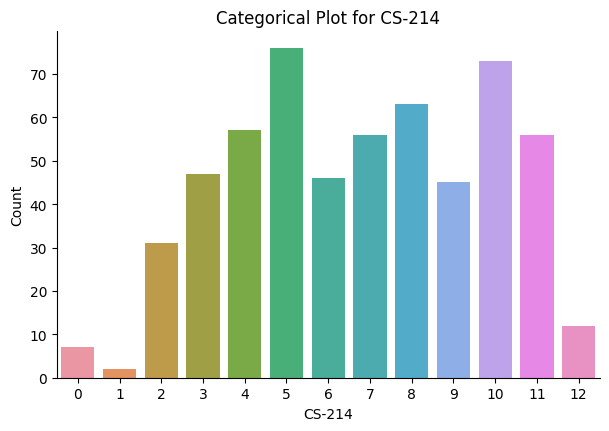

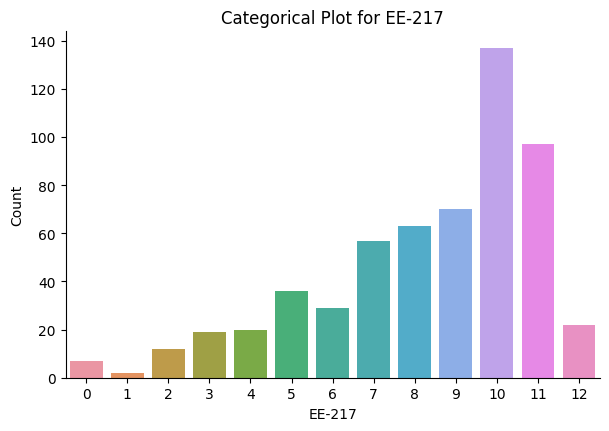

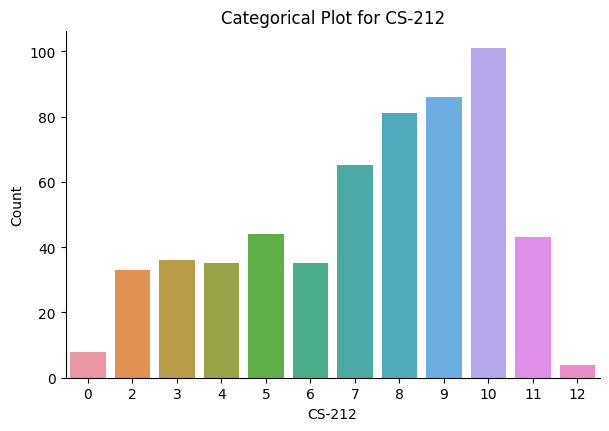

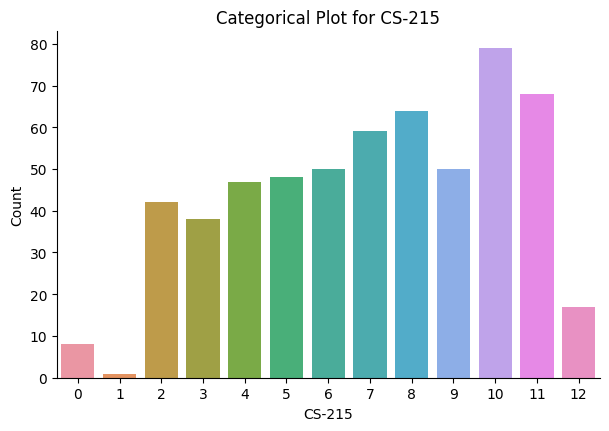

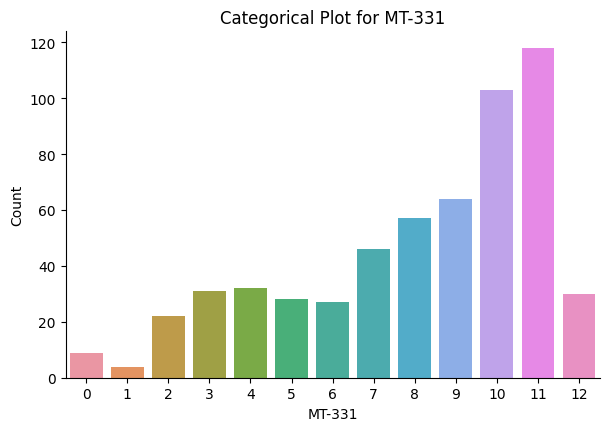

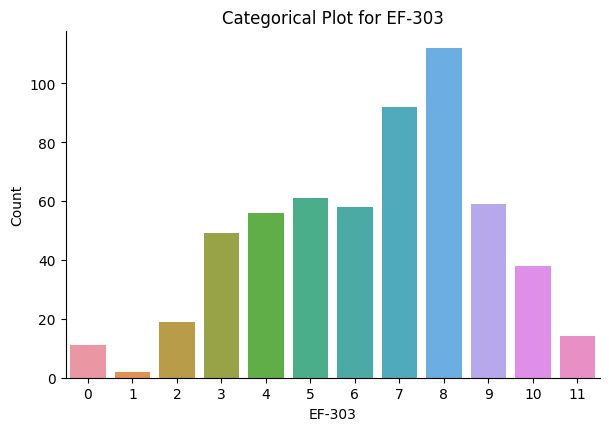

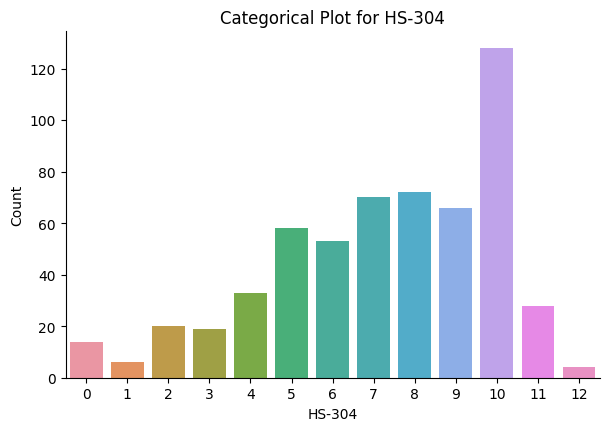

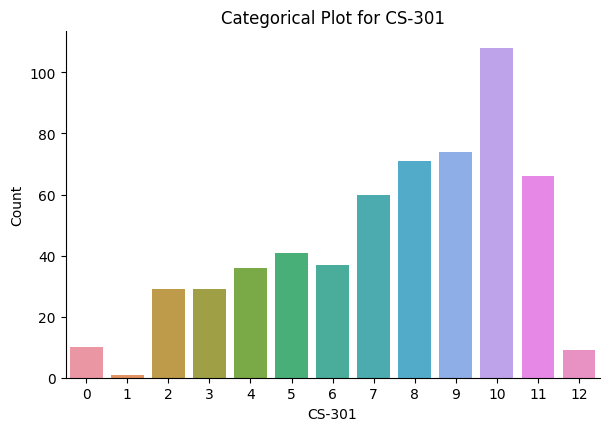

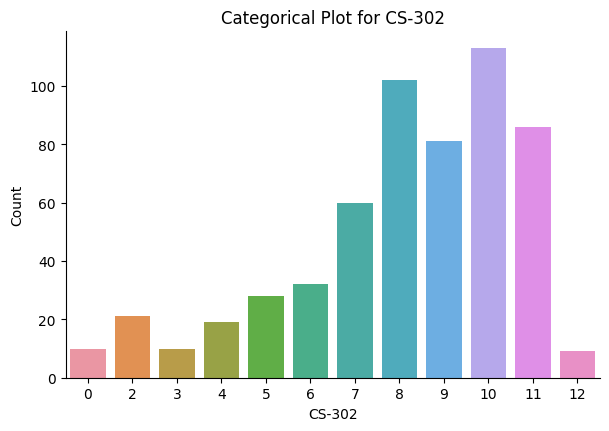

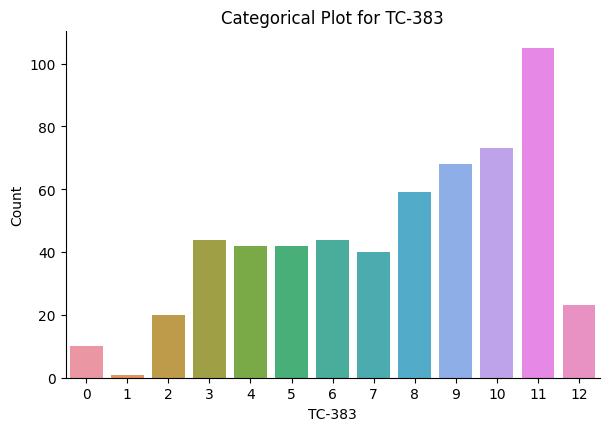

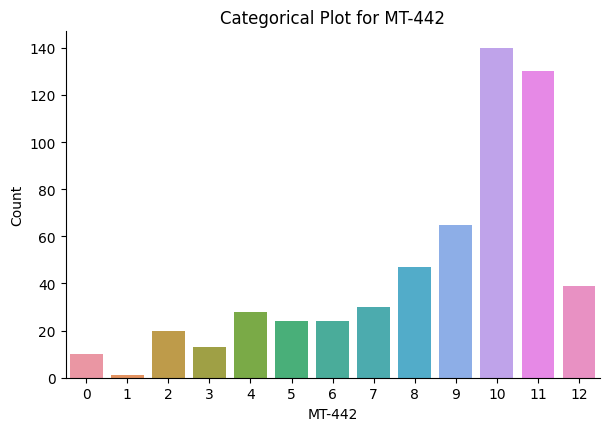

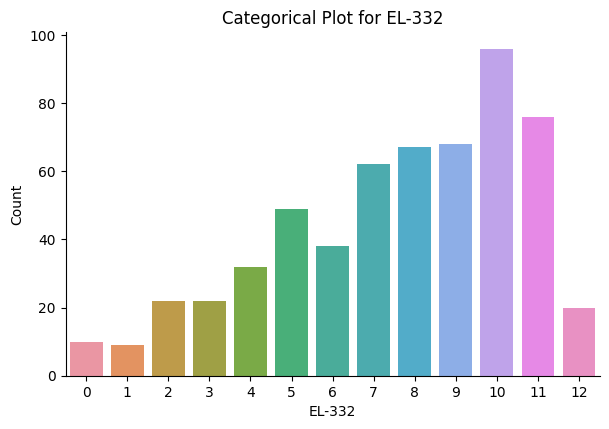

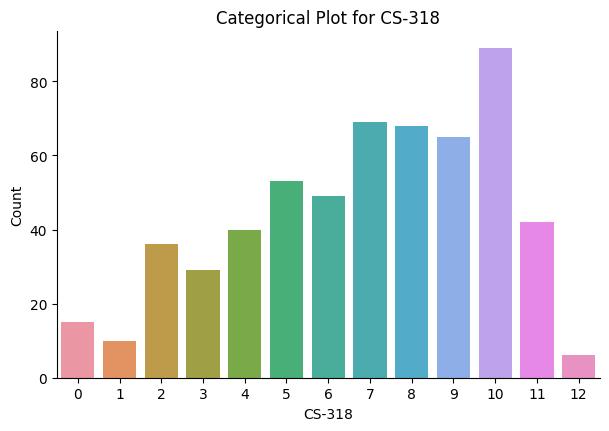

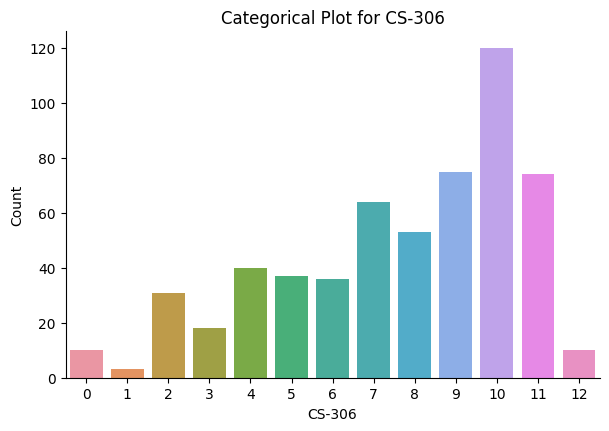

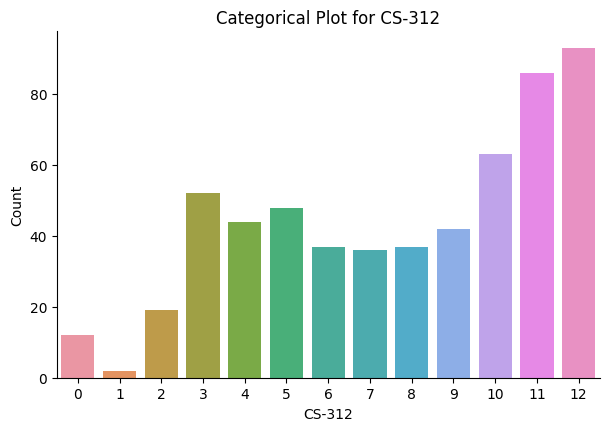

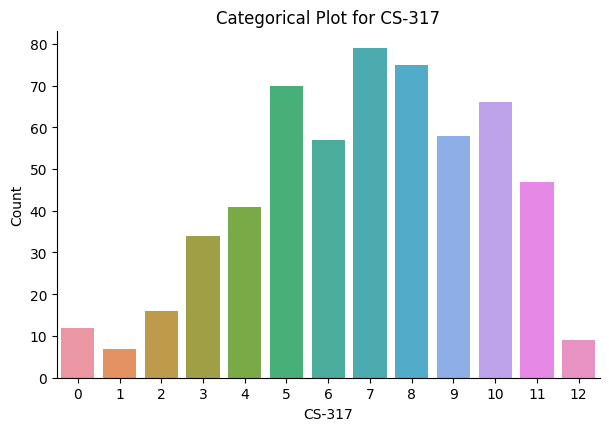

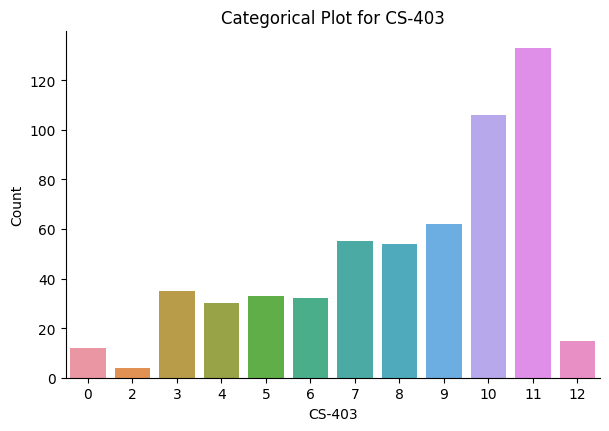

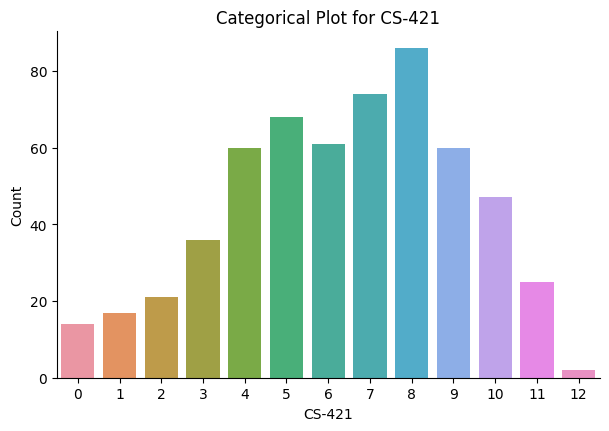

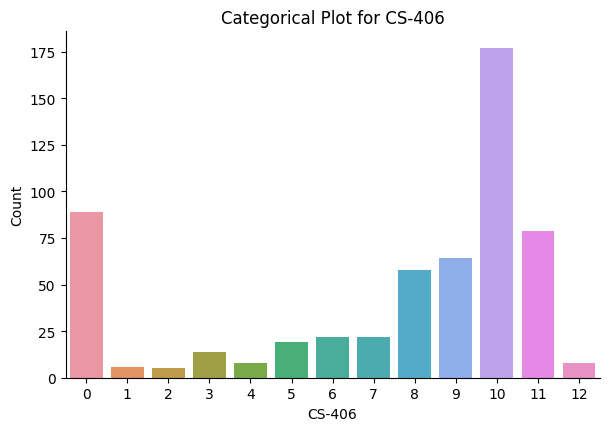

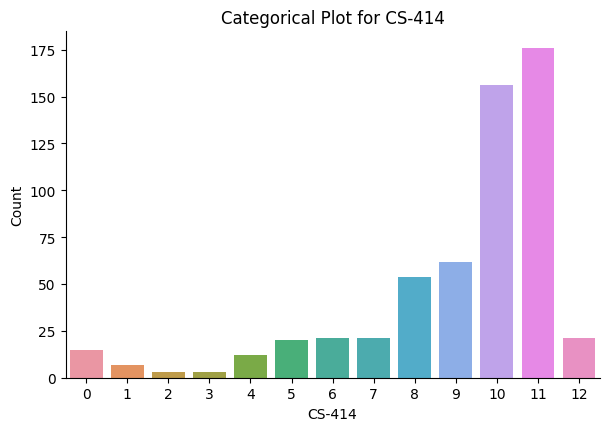

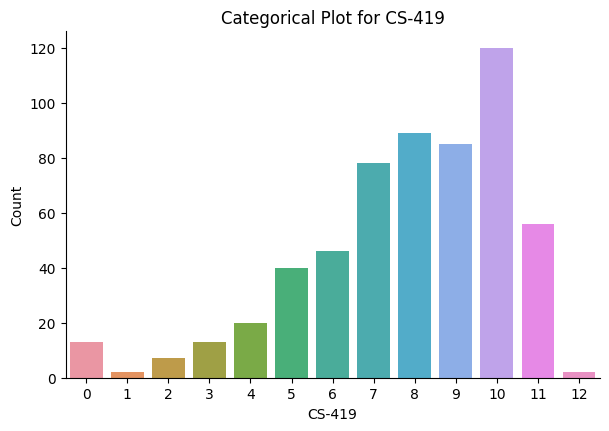

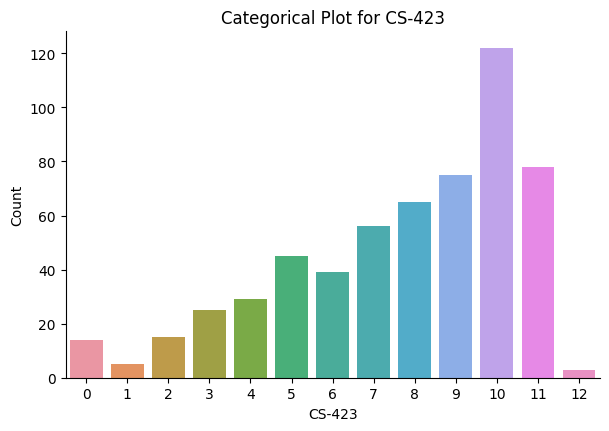

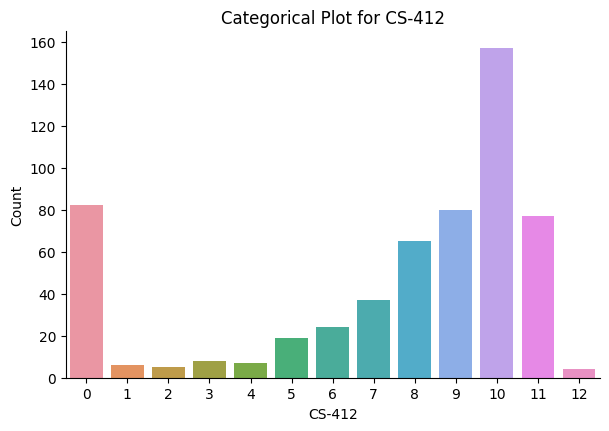

In [129]:
columns_to_plot = [
    'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
    'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
    'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224',
    'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
    'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304',
    'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332',
    'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
    'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
    'CS-412'
]

# Iterate through the specified columns and create catplots
for column_name in columns_to_plot:
    sns.catplot(data=df, x=column_name, kind='count', height=4, aspect=1.5)
    plt.title(f'Categorical Plot for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')

plt.show()

In [130]:
df1.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.408386,0.635511,0.559989,0.514876,0.672645,0.331192,0.447970,0.662131,0.580436,...,0.110444,0.541632,0.433611,0.417510,0.471613,0.294239,0.537266,0.210480,0.569111,0.680941
HS-101,0.408386,1.000000,0.364558,0.492275,0.474669,0.444827,0.371541,0.388681,0.330108,0.369789,...,0.268532,0.416638,0.284490,0.371644,0.130760,0.291344,0.314749,0.286881,0.300680,0.560989
CY-105,0.635511,0.364558,1.000000,0.588660,0.593188,0.626817,0.428262,0.501964,0.570539,0.494818,...,0.363460,0.575047,0.606454,0.500978,0.241058,0.249538,0.578042,0.285882,0.379592,0.696149
HS-105/12,0.559989,0.492275,0.588660,1.000000,0.535057,0.550257,0.542699,0.385736,0.478259,0.388865,...,0.358199,0.560095,0.556296,0.514516,0.212199,0.240498,0.542060,0.332018,0.289704,0.669029
MT-111,0.514876,0.474669,0.593188,0.535057,1.000000,0.455679,0.572151,0.587290,0.456433,0.498980,...,0.561870,0.620111,0.517696,0.610740,0.133276,0.350739,0.588761,0.487250,0.237894,0.775621
CS-105,0.672645,0.444827,0.626817,0.550257,0.455679,1.000000,0.330249,0.386232,0.603357,0.500815,...,0.143079,0.462828,0.393735,0.376131,0.426713,0.277246,0.440740,0.183885,0.483445,0.644594
CS-106,0.331192,0.371541,0.428262,0.542699,0.572151,0.330249,1.000000,0.384775,0.317626,0.348004,...,0.560780,0.484346,0.558062,0.511081,0.041870,0.244552,0.535999,0.449231,0.100352,0.601119
EL-102,0.447970,0.388681,0.501964,0.385736,0.587290,0.386232,0.384775,1.000000,0.447828,0.487005,...,0.432274,0.531170,0.422337,0.466066,0.117176,0.400610,0.466488,0.470545,0.240882,0.674604
EE-119,0.662131,0.330108,0.570539,0.478259,0.456433,0.603357,0.317626,0.447828,1.000000,0.611633,...,0.227949,0.511708,0.440556,0.447152,0.369531,0.313799,0.531606,0.315639,0.445232,0.690414
ME-107,0.580436,0.369789,0.494818,0.388865,0.498980,0.500815,0.348004,0.487005,0.611633,1.000000,...,0.295989,0.535793,0.431137,0.479180,0.283327,0.287362,0.536151,0.327428,0.402561,0.694650


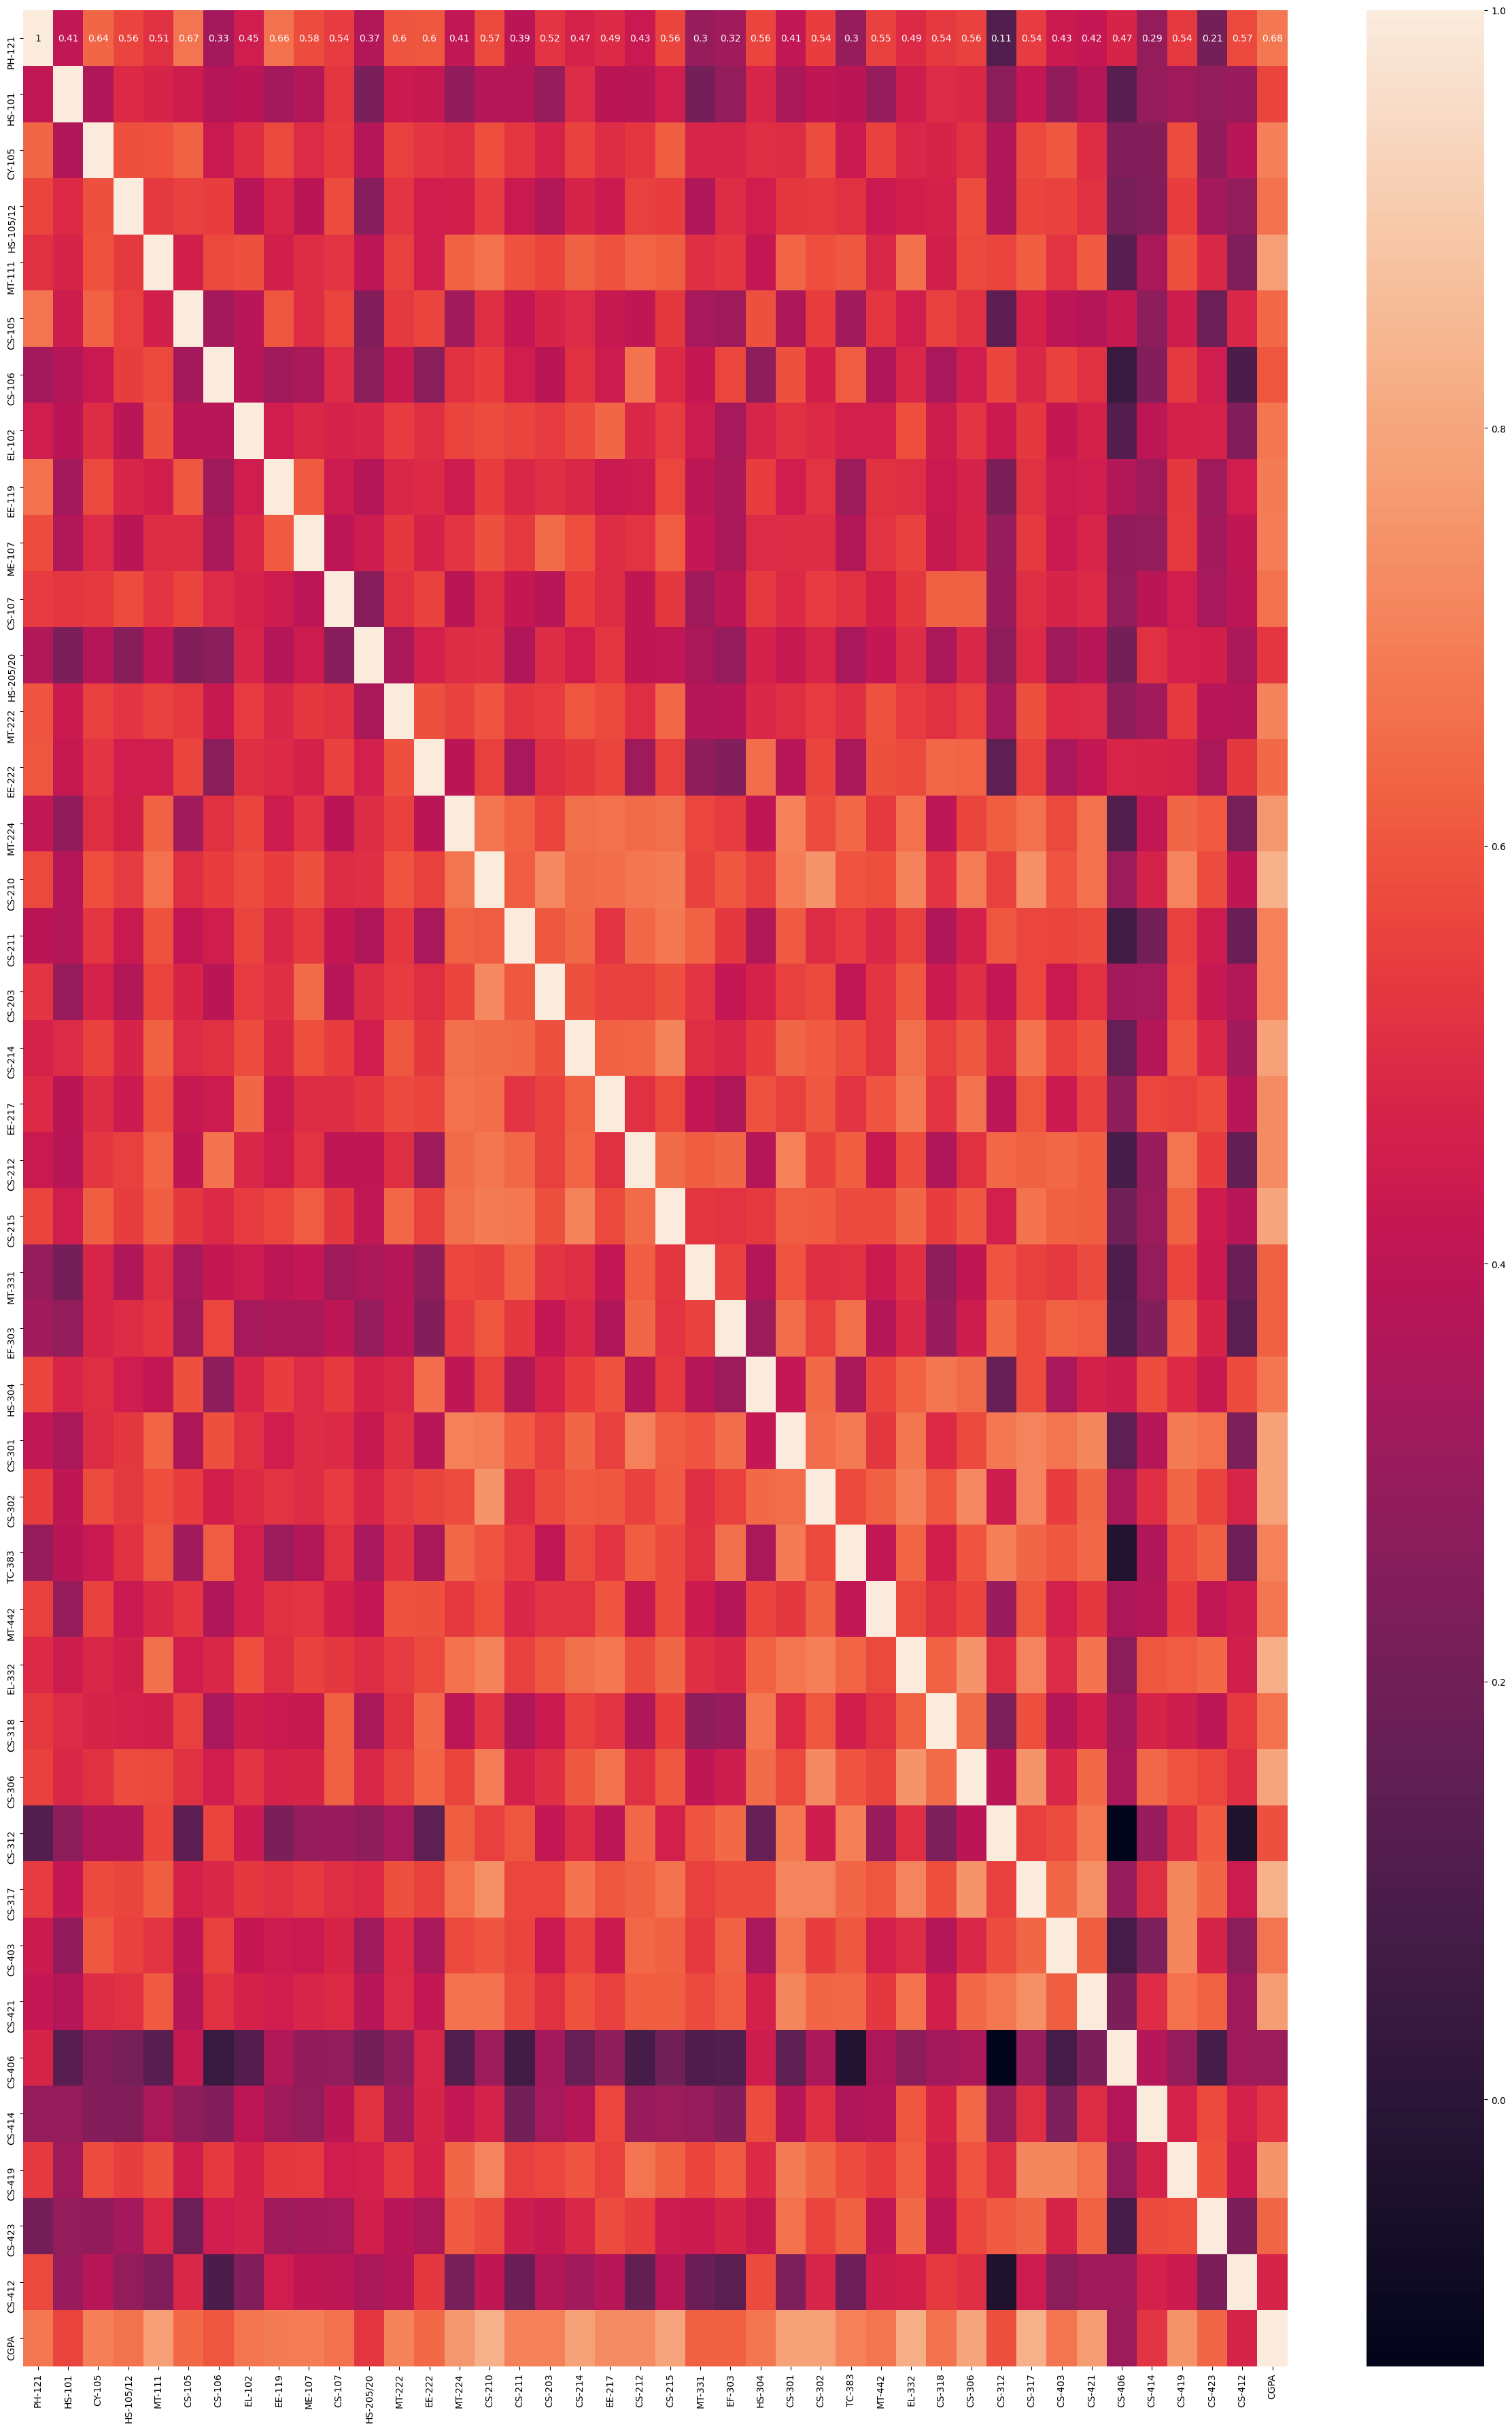

In [131]:
plt.figure(figsize=(30,45))
sns.heatmap(df1.corr(),annot = True)
plt.show()

## Spliting the data into x and y

In [132]:
X=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [133]:
print("X_train shape:",X_train.shape,)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test.shape:",y_test.shape)

X_train shape: (456, 41)
y_train shape: (456,)
X_test shape: (115, 41)
y_test.shape: (115,)


## Linear Regression

In [134]:
LR= LinearRegression()
LR.fit(X_train, y_train)
pred_LR=LR.predict(X_test)
print(LR.score(X_train,y_train))
print(r2_score(y_test,pred_LR))
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean squared error:',mean_squared_error(y_test,pred_LR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

0.9608618682647135
0.9600932645755855
Mean absolute error: 0.07725737526366734
Mean squared error: 0.013280464545179746
Root mean squared error: 0.11524089788430036


## KNeighborsRegressor

In [135]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
pred_KNN = KNN.predict(X_test)
print(r2_score(y_test,pred_KNN))
print('Mean absolute error:',mean_absolute_error(y_test,pred_KNN))
print('Mean squared error:',mean_squared_error(y_test,pred_KNN))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_KNN)))

0.9689275715211473
Mean absolute error: 0.07795999999999999
Mean squared error: 0.010340517217391296
Root mean squared error: 0.10168833373298677


## DecisionTreeRegressor

In [136]:
DTR = DecisionTreeRegressor(max_depth=7,criterion='poisson')
DTR.fit(X_train,y_train)
pred_DTR = DTR.predict(X_test)
print('R2_score',r2_score(y_test,pred_DTR))
print('Mean absolute error:',mean_absolute_error(y_test,pred_DTR))
print('Mean squared error:',mean_squared_error(y_test,pred_DTR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score 0.7886563141291392
Mean absolute error: 0.20635244266602962
Mean squared error: 0.07033254655399448
Root mean squared error: 0.2652028403957893


## RandomForestRegressor

In [137]:
RFR = RandomForestRegressor(criterion='poisson',warm_start=True)
RFR.fit(X_train, y_train)
pred_RFR = RFR.predict(X_test)
print('R2_score',r2_score(y_test,pred_RFR))
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean squared error:',mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.9578948621452542
Mean absolute error: 0.08024426086956514
Mean squared error: 0.014012065494782604
Root mean squared error: 0.11837257070277137


## Support vector Regressor

In [138]:
SV = SVR(kernel='rbf',cache_size=100)
SV.fit(X_train, y_train)
pred_SVR = SV.predict(X_test)
print('R2_score',r2_score(y_test,pred_SVR))
print('Mean absolute error:',mean_absolute_error(y_test,pred_SVR))
print('Mean squared error:',mean_squared_error(y_test,pred_SVR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score 0.9845030987177988
Mean absolute error: 0.05244355991582734
Mean squared error: 0.005157175746140177
Root mean squared error: 0.0718134788611454


## GradientBoostingRegressor

In [139]:
GBR = GradientBoostingRegressor(n_estimators=300,subsample=.5,criterion="squared_error")
GBR.fit(X_train,y_train)
pred_GBR = GBR.predict(X_test)
print('R2_score',r2_score(y_test,pred_GBR))
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean squared error:',mean_squared_error(y_test,pred_GBR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 0.9755884285437789
Mean absolute error: 0.0649636356172189
Mean squared error: 0.008123866955504615
Root mean squared error: 0.09013249666743185


## Ridge

In [140]:
RR = Ridge(copy_X=True,solver='auto',positive=True)
RR.fit(X_train,y_train)
pred_RR = RR.predict(X_test)

print('R2_score',r2_score(y_test,pred_RR))
print('Mean absolute error:',mean_absolute_error(y_test,pred_RR))
print('Mean squared error:',mean_squared_error(y_test,pred_RR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RR)))

R2_score 0.9665604492799703
Mean absolute error: 0.07195411415940375
Mean squared error: 0.011128266018783476
Root mean squared error: 0.10549059682636873


## Lasso

In [141]:
L = Lasso(alpha=0.01,precompute=True,selection='random')
L.fit(X_train,y_train)
pred_L = L.predict(X_test)
print('R2_score',r2_score(y_test,pred_L))
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

R2_score 0.9635424315879687
Mean absolute error: 0.07373033316823357
Mean squared error: 0.0121326247198671
Root mean squared error: 0.11014819435590899


### Support vector Regressor gives better result

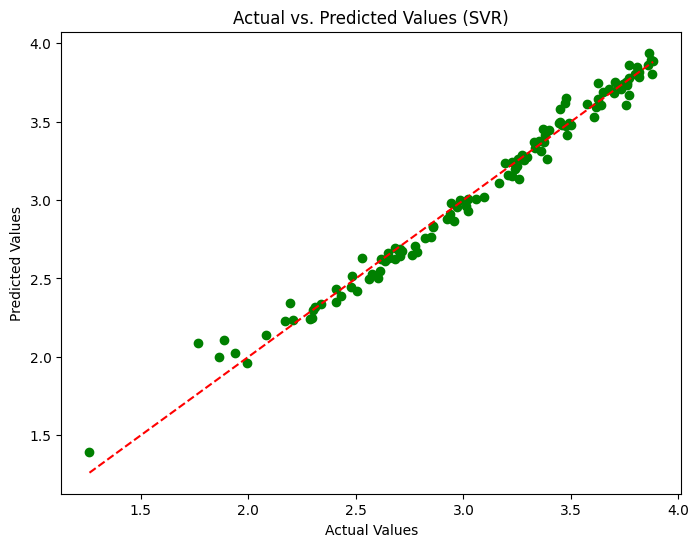

In [142]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_SVR, c='green', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', c='red' )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (SVR)')
plt.show()

## Saving The best model

In [143]:
# Save the model as a objectfile
import joblib

joblib.dump(GBR,'Student_grades_prediction')

['Student_grades_prediction']

In [144]:
model=joblib.load(open('Student_grades_prediction','rb'))

In [145]:
df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,7,3,4,5,4,3,2,4,7,4,...,4,4,4,4,10,11,4,8,10,2.205
1,11,2,3,2,7,5,2,11,3,2,...,3,2,5,2,10,7,5,5,8,2.008
2,11,8,11,7,9,11,7,9,10,10,...,8,8,11,5,11,11,11,10,11,3.608
3,2,6,3,2,2,10,3,4,2,6,...,3,5,3,4,7,8,6,6,6,1.906
4,10,10,10,9,11,11,10,9,11,10,...,7,9,9,7,10,11,10,10,11,3.448


In [148]:
# Save the DataFrame as a CSV file
df1.to_csv("df", index=False)  # Set index=False to exclude the index column in the CSV file

In [152]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,7,3,4,5,4,3,2,4,7,...,4,4,4,4,10,11,4,8,10,2.205
1,CS-97002,11,2,3,2,7,5,2,11,3,...,3,2,5,2,10,7,5,5,8,2.008
2,CS-97003,11,8,11,7,9,11,7,9,10,...,8,8,11,5,11,11,11,10,11,3.608
3,CS-97004,2,6,3,2,2,10,3,4,2,...,3,5,3,4,7,8,6,6,6,1.906
4,CS-97005,10,10,10,9,11,11,10,9,11,...,7,9,9,7,10,11,10,10,11,3.448


7,3,4,5,4,3,2,4,7,4,4,9,2,10,7,6,3,3,2,11,2,4,5,4,6,8,5,6,9,5,4,5,4,4,4,4,10,11,4,8,10

In [151]:
test = (7,3,4,5,4,3,2,4,7,4,4,9,2,10,7,6,3,3,2,11,2,4,5,4,6,8,5,6,9,5,4,5,4,4,4,4,10,11,4,8,10) #taking data from 1st row of the data
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = model.predict(reshape)
print(pred)

[2.21749951]
